# Лабораторная работа №6.
## Малютин Александр БПМ152.
### Вариант 20.


### Задача 6.1.19. 
Функция $y=f(x)$ задана таблицей  значений $y_0, y_1,...y_n$ в точках $x_0,x_1,...x_n$. Используя метод наименьших квадратов (МНК), найти многочлен $P_{m}(x)=a_0+a_{1}x+...+a_{m}x^m$ наилучшего  среднеквадратичного  приближения оптимальной степени $m=m^*$. За оптимальное значение $m^*$ принять ту степень многочлена, начиная с которой величина  
$$
    \sigma_{m} = \sqrt{\frac{1}{n-m}(P_{m}(x_{k}) - y_{k})^2}
$$
стабилизируется или начинает возрастать. 
         
ПОРЯДОК   РЕШЕНИЯ  ЗАДАЧИ:
1. Задать векторы $x$ и $y$ исходных данных. 
2. Используя функцию $mnk$ (см. ПРИЛОЖЕНИЕ 6.В), найти многочлены $P_{m}, m=0,1,2,...,$ по методу наименьших квадратов. Вычислить соответствующие им значения $\sigma_{m}$.
3. Построить   гистограмму зависимости $\sigma_{m}$ от $m$, на основании которой выбрать оптимальную степень $m^*$ многочлена наилучшего  среднеквадратичного  приближения.
4. На одном чертеже построить графики многочленов $P_{m}, m=0,1,2,..., m^{*},$ и точечный график исходной функции. 

In [59]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
x = np.array([6, 6.4, 6.8, 7.2, 7.6, 8, 8.4, 8.8, 9.2, 9.6, 10])
y = np.array([7.079, -1.509, -7.654, -12.211, -13.941, -15.117, -13.720, -10.702, -4.696, 3.501, 10.572])

In [61]:
def OLS(x, y, n, m):
    b = [sum(y*x**j) for j in range(m)]
    G = [[sum(x[i]**(j+k) for i in range(n)) for k in range(m)]  for j in range(m)]
    
    return np.linalg.solve(G, b)

In [62]:
OLS(x, y, len(x), 4)

array([ 4.03220030e+02, -1.11379478e+02,  8.07207168e+00, -8.54306285e-02])

In [63]:
def P(x, coef):
    X = np.array([x**i for i in range(len(coef))])
    return sum(X * coef)

In [64]:
def sigma(x, y):
    n = len(x)
    return np.array(
        [np.sqrt(1/(n-m)*(P(x[m], OLS(x, y, n, m))-y[m])**2) for m in range(1, n)]
    )    

In [65]:
sigmas = sigma(x, y)

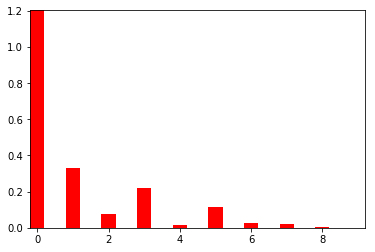

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111)
xx = np.array(range(len(sigmas)))
ax.bar(xx, sigmas, width=0.4,color='r',align='center')
ax.autoscale(tight=True)

plt.show()

In [67]:
np.argmin(sigmas) + 1

10

### Возьмёмь полином 10й степени

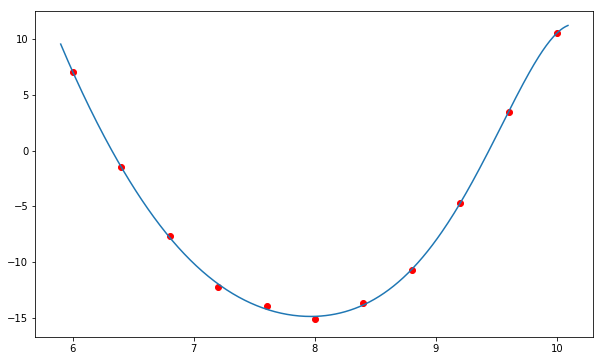

In [68]:
X = np.arange(x[0]-0.1, x[-1]+0.1, 0.01)
Y = np.array([P(x0, OLS(x, y, len(x), 10)) for x0 in X])

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(X, Y)
ax.scatter(x, y,color ='r')
plt.show() 

### График для всех степеней

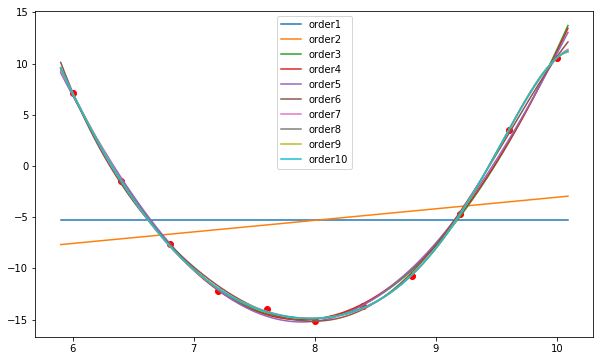

In [69]:
X = np.arange(x[0]-0.1, x[-1]+0.1, 0.01)
Y = np.array([np.array([P(x0, OLS(x, y, len(x), i)) for x0 in X]) for i in range(1,len(x))])

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x, y,color ='r')
for i in range(len(Y)):
    ax.plot(X, Y[i], label ="order"+str(i+1))
    
ax.legend()
plt.show() 

### Задача 6.2.2. 
В таблице приведены результаты наблюдений за перемещением $x$ материальной точки по оси $Ох$ в моменты  времени $t\in[t_{0},T]$.  Известно, что движение является равномерным и описывается линейной зависимостью $x(t)=vt+b$.  Используя  метод наименьших квадратов, определить скорость $v$ и спрогнозировать положение точки в момент времени  $t=2T$. На одном чертеже  построить график движения точки  и точечный график исходных наблюдений.

In [76]:
t = np.array([1, 1.625, 2.25, 2.88, 3.5, 4.13, 4.75, 5.375, 6])
x = np.array([14.86, 27.15, 41.19, 54, 69.03, 81.6, 96.11, 109.4, 124.03])

In [84]:
v, b = OLS(t, x, len(t), 2)
print("x(t) = " + str(v)+" t + " + str(b))

x(t) = -8.040871512628039 t + 21.88949043521588


Следовательно $v = 21.88949044$

In [86]:
x_pred = v*2*6 + b
print("Положение точки в момент 2T =", x_pred)

Положение точки в момент 2T = -74.6009677163206


### Построим график

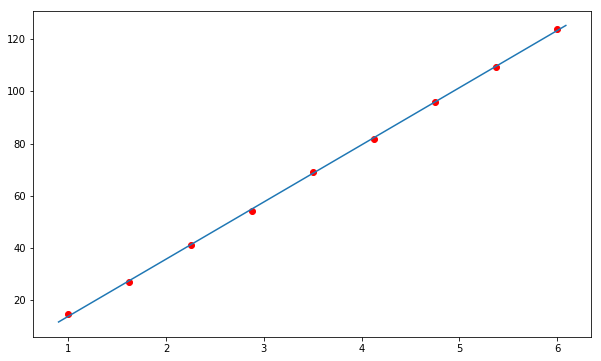

In [72]:
T = np.arange(t[0]-0.1, t[-1]+0.1, 0.01)
X = np.array([P(t0, OLS(t, x, len(t), 2)) for t0 in T])

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(T, X)
ax.scatter(t, x, color ='r')
plt.show() 

### Задача 6.3.10. 
Зависимость между величинами $x$ и $y$ описывается функцией   $y=f(x,a,b)$, где $a$ и $b$ – неизвестные параметры. Найти  эти параметры, сведя исходную задачу к линейной задаче метода наименьших квадратов.

УКАЗАНИЕ. 

Свести исходную задачу к  линейной задаче МНК  можно, сделав подходящую замену переменных. Например, если исходная зависимость имеет вид $y=e^{a+bx^{2}}$, то  прологарифмировав исходное равенство и введя новые переменные $s=\ln{y}$ и $t=x^2$ , получаем задачу об определении коэффициентов линейной зависимости $s=a+bt$.


$$f(x,a,b)=(ax+b)\cos{x}$$

In [109]:
x = np.array([-1.0,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1.0])
y = np.array([0.756,1.0033,1.2215,1.4,1.5289,1.6,1.6073,1.5474,1.4196,1.2262,0.9725])

#### Заменим:
$$s=\frac{y}{\cos{x}}$$
#### Получим:
$$s=ax+b$$

In [110]:
s = y / np.cos(x)
print(s)

[1.39921668 1.44006077 1.48000399 1.5199862  1.55999606 1.6
 1.63999063 1.68001903 1.72002756 1.75999453 1.79991829]


In [123]:
b, a = OLS(x, s, len(x), 2)
print("s = " + str(a) + " x + " + str(b))

s = 0.2001533640483094 x + 1.5999285209418679


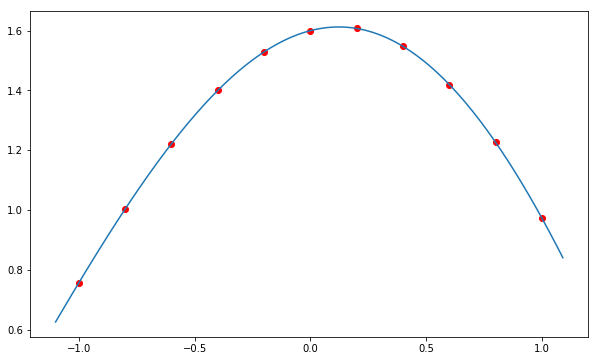

In [124]:
X = np.arange(x[0]-0.1, x[-1]+0.1, 0.01)
Y = np.array([ (a*x0 + b)*np.cos(x0) for x0 in X])

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(X, Y)
ax.scatter(x, y, color ='r')
plt.show() 

### Получилось)